In [105]:
import gensim
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from neurotools.io.gdrive import download_sheets_doc
from neurotools.io.files import load_embedding_model
from itertools import product
from sklearn.externals import joblib
%matplotlib inline


# PROCESS EMBEDDING AND DIMENSIONS

## LOAD EMBEDDING AND DIMENSIONS

In [101]:
emb, word2rank_dict = load_embedding_model('005_en_in_commoncrawl_v1_20180330.bin')

In [175]:
cutoff = round((1/5)*len(word2rank_dict))

In [3]:
def get_average_vector(words, emb):
    """
        Average the word vectors of a list of words.
    """
    words_in_emb = [emb[word] for word in words if word in emb.vocab.keys()]
    total = np.sum(words_in_emb, axis=0)
    count = len(words_in_emb)
    return total / count

In [ ]:
dimensions_doc_id = '1qa6hmUwjipTocTLIAIBEuObkzVGwWUvYXV04HjMw0BM'
dimensions_doc = download_sheets_doc(dimensions_doc_id, has_column_labels=True)
dimensions_nf = dimensions_doc['dimensions_v2.csv']
dimensions_nf = dimensions_nf.loc[(dimensions_nf['whisky_relevant'] == '1') & (dimensions_nf['en'] != ''), ['en_label', 'en']]
dimensions_nf['en_label'] = 'nf_' + dimensions_nf['en_label']

In [384]:
dimensions_nf

,en_label,en
7,nf_appealing,loved love positive desireable desire want asp...
59,nf_expensive,Costly Extravagant Pricey Upscale
64,nf_fascination,fascination fascinated inspired intrigued capt...
69,nf_fresh,"fresh activate, awaken/wake, rebirth, refresh,..."
75,nf_healthy_positive,high-antioxidant vitamin rich healthy energy-b...
82,nf_winner,winner champ first award medal champion pride ...
100,nf_mild,"mild safe, (skin) friendly, natural, harmony, ..."
104,nf_modern,"Contemporary, Current, Present-day, Latest, Fr..."
114,nf_natural,natural balanced beneficial biodegradable biod...
118,nf_new,new fresh all_new brand_new model


In [57]:
diageo_dimensions_doc_id = '1_OdlI2ieNMAXAepeqtjDIghRVj6Lgoaf9caiZK8jmkA'
diageo_dimensions_doc = download_sheets_doc(diageo_dimensions_doc_id, has_column_labels=True)
dimensions_diageo = diageo_dimensions_doc['Dimensions']
dimensions_diageo = dimensions_diageo.loc[dimensions_diageo['Content'] != '', ['Dimension', 'Content']]
dimensions_diageo['Dimension'] = 'dg_' + dimensions_diageo['Dimension']

In [58]:
dimensions_nf.columns = ['Dimension', 'Content']

In [59]:
dimensions_nf.shape

(16, 2)

In [60]:
dimensions = pd.concat([dimensions_diageo, dimensions_nf], axis=0, ignore_index=True)

In [62]:
dimensions.append{}

In [63]:
dimensions

,Dimension,Content
0,dg_Relaxed,relax unwind enjoy soothe calm serene leisurel...
1,dg_Confident,confident optimistic hopeful reassure certainl...
2,dg_Welcoming,welcome greet warmly hospitable invite graciou...
3,dg_Social,social civil collective community cordial
4,dg_Playful,playful delightful lighthearted lively flirtat...
5,dg_Street-Smart,hardened astute cunning experienced savvy stre...
6,dg_Progressive,progressive dynamic enlightened modern
7,dg_Stylish,stylish classy chic trendy elegant fashionable...
8,dg_Inspiring,inspired inspiration passionate incredible upl...
9,dg_Authentic,authentic genuine unique unpretentious


In [71]:
additions = [{'Dimension': 'dg_flavour', 'Content': 'rich malt fruity simple delicate sweetness'},
{'Dimension': 'dg_brand', 'Content': 'street wise street smart smart thinking'}]

In [73]:
dimensions = dimensions.append(additions)

In [74]:
dimensions.to_csv('csv/dimensions.csv', index=False)

In [410]:
dimensions = pd.read_csv('csv/dimensions.csv')

## GET WORD VECTORS OF DIMENSIONS

In [414]:
dimensions['tokens'] = dimensions['Content'].str.lower().str.replace(r'[^a-z ]', '').str.split()

In [415]:
dimensions['wv'] = dimensions['tokens'].map(lambda x: get_average_vector(x, emb))

In [416]:
dimensions.head()

,Dimension,Content,tokens,wv
0,dg_Relaxed,relax unwind enjoy soothe calm serene leisurel...,"[relax, unwind, enjoy, soothe, calm, serene, l...","[-0.38982093, 1.0310897, -0.3649658, -1.062084..."
1,dg_Confident,confident optimistic hopeful reassure certainl...,"[confident, optimistic, hopeful, reassure, cer...","[0.35235944, -2.103267, 0.75326306, -2.0183167..."
2,dg_Welcoming,welcome greet warmly hospitable invite graciou...,"[welcome, greet, warmly, hospitable, invite, g...","[0.32264853, -1.3409846, 0.8682901, -1.4583006..."
3,dg_Social,social civil collective community cordial,"[social, civil, collective, community, cordial]","[0.95336664, -1.0829761, 1.1170304, -0.0309140..."
4,dg_Playful,playful delightful lighthearted lively flirtat...,"[playful, delightful, lighthearted, lively, fl...","[-0.72059196, -0.50438666, -0.35774776, -1.436..."


In [14]:
dimensions.shape[0]

48

# LOAD CANDIDATE WORDS

In [312]:
diageo_words_doc_id = '1Vc_NYmC69G0KkdvrUS79jhhu85p5wkhfGnwc9aHTDeM'
diageo_words_doc = download_sheets_doc(diageo_words_doc_id, has_column_labels=True)

In [313]:
sheetnames = list(diageo_words_doc.keys())

In [314]:
pool = []
for sheetname in sheetnames:
    sheet = diageo_words_doc[sheetname]
    words = list(sheet.loc[sheet['Select']=='1', 'Word'].values)
    print(sheetname, len(words))
    pool.extend(words)
pool = set(pool)

malt 25
sweet, sweetness 0
streetwise, streetsmart, thinking, clever, sharp, ease 41
smooth, smoothness 42
richness, rich 0
Smart thinking, Select Indian Barley, delicate sweetness 45
Smart thinking, Extra Malt, rich taste 37
Smart thinking, Select Indian Barley, smooth taste 43
fruity 45
woody wood taste 38
grain 0
malt, rich, malt, fruity, simple, delicate, sweetness 49
malt, streetwise, streetsmart, thinking, clever, sharp, ease 0
grain, rich, malt, fruity, simple, delicate, sweetness 0
malt + brand and flavour profile 47


In [315]:
ingredients = ['malt', 'grain']
flavors = ['sweet, sweetness',
           'richness, rich',
           'smooth, smoothness',
           'fruity',
           'woody wood taste']
smart_thinking = ['streetwise, streetsmart, thinking, clever, sharp, ease', 'smooth, smoothness']

In [316]:
def get_words_from_df(df):
    return list(df['Word'].values)

In [317]:
def filter_words_on_cutoff(words, word2rank_dict, cutoff):
    return [word for word in words if word2rank_dict[word] < cutoff]

In [318]:
def get_words_for_hook(sheet_dict, hook_keys, word2rank_dict, cutoff=None):
    container = []
    for key in hook_keys:
        container.extend(get_words_from_df(sheet_dict[key]))
    words = list(set(container))#filter_words_on_cutoff(set(container), word2rank_dict, cutoff)
    return words

In [319]:
words_ingredients = get_words_for_hook(diageo_words_doc, ingredients, word2rank_dict)
words_flavors = get_words_for_hook(diageo_words_doc, flavors, word2rank_dict)
words_smart_thinking = get_words_for_hook(diageo_words_doc, smart_thinking, word2rank_dict)

In [320]:
used = set(words_ingredients+words_flavors+words_smart_thinking)

In [321]:
# pool.difference(used)

In [322]:
pool_flavor = ['flavourful', 'good', 'tasty', 'heady']
pool_ingredients = ['wine', 'vanilla', 'mix', 'acidity']
pool_brandprofile = ['elegant', 'traditional', 'subtly', 'subtlety', 'softness', 'select', 'refine', 'pure', 'perfect', 'indian', 'combination', 'extra']

In [323]:
# Check words used in pool only

In [324]:
words_flavors = set(words_flavors + pool_flavor)
words_ingredients = set(words_ingredients + pool_ingredients)
words_smart_thinking = set(words_smart_thinking + pool_brandprofile)

In [325]:
def get_df_for_hook(words):
    df = pd.DataFrame(list(words), columns = ['word'])
    df['wv'] = df['word'].map(lambda x: get_average_vector([x], emb))
    return df

In [326]:
df_ingredients = get_df_for_hook(words_ingredients)
df_flavors = get_df_for_hook(words_flavors)
df_smart_thinking = get_df_for_hook(words_smart_thinking)

In [327]:
df_flavors['wv']

0      [-2.285555, 4.174135, -3.8058991, 0.3666341, 0...
1      [1.0939593, 1.5659078, -1.4330549, 0.6782321, ...
2      [-0.40082756, 1.0223584, -0.022040904, -0.8599...
3      [-0.65053314, 2.1985075, -1.6174093, 0.3361521...
4      [-1.1959441, 1.5053833, -1.056813, 0.05439021,...
5      [-0.93764526, 3.9425743, -0.24510638, 1.621882...
6      [-0.18671349, 0.88266194, -0.88809836, 1.82801...
7      [-2.0911205, 1.7614963, -2.0859196, 1.6431406,...
8      [-0.79675376, 1.2761999, -0.74892694, 0.271612...
9      [0.4225343, 1.2297592, -0.6840582, 0.43933874,...
10     [-1.3905925, 3.049595, -2.992241, 0.8480516, 0...
11     [-0.19442195, 1.3884451, 1.4209977, 2.5583093,...
12     [-0.12140094, 1.4854048, -2.9641218, -0.301162...
13     [3.229446, 4.4551606, 1.3755842, -3.1002033, -...
14     [0.22361554, 0.95010895, 1.3718712, 1.2069627,...
15     [0.42710444, 2.240475, -2.3363483, -0.08586323...
16     [1.5846424, 0.4507386, -1.583942, 2.33391, -1....
17     [1.724155, 1.3411754, -0

# GET SIMILARITY OF WORDS WITH WHISKY AND VALENCE SCORE

In [328]:
def cosine_similarity(a,b):
    """
        Compute the cosine similarity of a and b.
    """
    return np.dot(a,b) / ( (np.dot(a,a) **.5) * (np.dot(b,b) ** .5) )

In [329]:
def get_similarity_with_dimensions(row, dims):
    """
        Get similarity of row's word vector and every dimension.
        row : row of the movie dataframe
        dimensions : dataframe containing Neuroflash dimensions
    """
    for k in range(dims['Dimension'].shape[0]):
        name = 'dim_' + str(dims['Dimension'].iloc[k])
        # define a new column for the cosine similarity of dimension k and the post text
        row[name] = cosine_similarity(row['wv'], dims['wv'].iloc[k])
    return row

In [330]:
valence_model = joblib.load('005_en_in_commoncrawl_v1_2018_0330.pkl')

In [331]:
def get_df_whisky_sim_and_valence_score(df):
    df['used_in_graph'] = (df['word'].map(lambda x: x in pool)).astype(int)
    df['rank'] = df['word'].map(word2rank_dict)
    df['rank_quartile'] = pd.qcut(df['rank'], 3, [0,1,2])
    df['rank_in_top20%'] = (df['rank'] < cutoff).astype(int)
    df['sim_whisky'] = df['wv'].map(lambda x: cosine_similarity(x, emb['whisky']))
    df['valence'] = df['wv'].map(lambda x: valence_model.predict(x.reshape(1, -1))[0][0])
    df['sum_sim_valence'] = df['sim_whisky'] + df['valence']
    df = df.drop(['wv'], axis=1)
    df = df.sort_values('sum_sim_valence', ascending=False)
    return df

In [332]:
df_flavors = get_df_whisky_sim_and_valence_score(df_flavors)
df_ingredients = get_df_whisky_sim_and_valence_score(df_ingredients)
df_smart_thinking = get_df_whisky_sim_and_valence_score(df_smart_thinking)

In [334]:
df_flavors.to_csv('csv/pool_flavor_by_sum.csv', index=False)
df_ingredients.to_csv('csv/pool_ingredients_by_sum.csv', index=False)
df_smart_thinking.to_csv('csv/pool_brandprofile_by_sum.csv', index=False)

df_flavors.sort_values('sim_whisky', ascending=False).to_csv('csv/pool_flavor_by_whisky.csv', index=False)
df_ingredients.sort_values('sim_whisky', ascending=False).to_csv('csv/pool_ingredients_by_whisky.csv', index=False)
df_smart_thinking.sort_values('sim_whisky', ascending=False).to_csv('csv/pool_brandprofile_by_whisky.csv', index=False)

df_flavors.sort_values('valence', ascending=False).to_csv('csv/pool_flavor_by_valence.csv', index=False)
df_ingredients.sort_values('valence', ascending=False).to_csv('csv/pool_ingredients_by_valence.csv', index=False)
df_smart_thinking.sort_values('valence', ascending=False).to_csv('csv/pool_brandprofile_by_valence.csv', index=False)

# Diageo Selected Dimensions

In [408]:
winner_words = '1TwJ6ychV5At6qhU-nVtBqqEDvVTiTAUuD0YxglwkwIc'
winner_words = download_sheets_doc(winner_words, has_column_labels=True)

In [353]:
label = ['Dimension', 'tokens']
malt = ['dg_malt', ['malt']]
smoothness = ['dg_smoothness', ['smooth', 'creamy', 'easy', 'fluid', 'gentle', 'mild', 'serene', 'silky', 'velvety', 'sleek']]
smart_thinking =['dg_smart_thinking', ['streetwise', 'streetsmart', 'thinking', 'clever', 'sharp', 'ease']]
richness = ['dg_richness', ['rich', 'richness']]

In [354]:
chosen_ones = pd.DataFrame.from_records([malt, smoothness, smart_thinking, richness], columns=label)

In [355]:
chosen_ones['wv'] = chosen_ones['tokens'].map(lambda x: get_average_vector(x, emb))

In [356]:
chosen_ones

,Dimension,tokens,wv
0,dg_malt,[malt],"[0.6481842, 3.2436092, -1.630463, 0.0014497653..."
1,dg_smoothness,"[smooth, creamy, easy, fluid, gentle, mild, se...","[-1.3913215, 1.5429388, -1.9929647, -0.1399003..."
2,dg_smart_thinking,"[streetwise, streetsmart, thinking, clever, sh...","[-0.22701593, 0.6035686, -0.97848374, 1.718363..."
3,dg_richness,"[rich, richness]","[-0.9195142, 2.466971, -1.8364742, -0.9397965,..."


# Chosen Word Analysis

In [510]:
def return_top_k_words(df, k):
    return (df[['word', 'rank_quartile']].head(k))

In [527]:
tf = return_top_k_words(df_flavors, 10)
ti = return_top_k_words(df_ingredients, 10)
ts = return_top_k_words(df_smart_thinking, 10)

In [528]:
# tf = pd.read_csv('csv/top_flavors_rank.csv')
# ti = pd.read_csv('csv/top_ingredients_rank.csv')
# ts = pd.read_csv('csv/top_smart_thinking_rank.csv')

In [529]:
tf['wv'] = tf['word'].map(lambda x: get_average_vector(x, emb))
ti['wv'] = ti['word'].map(lambda x: get_average_vector(x, emb))
ts['wv'] = ts['word'].map(lambda x: get_average_vector(x, emb))

In [559]:
chosen_ones

,Dimension,tokens,wv
0,dg_malt,[malt],"[0.6481842, 3.2436092, -1.630463, 0.0014497653..."
1,dg_smoothness,"[smooth, creamy, easy, fluid, gentle, mild, se...","[-1.3913215, 1.5429388, -1.9929647, -0.1399003..."
2,dg_smart_thinking,"[streetwise, streetsmart, thinking, clever, sh...","[-0.22701593, 0.6035686, -0.97848374, 1.718363..."
3,dg_richness,"[rich, richness]","[-0.9195142, 2.466971, -1.8364742, -0.9397965,..."


In [585]:
dimensions

,Dimension,Content,tokens,wv
0,dg_Relaxed,relax unwind enjoy soothe calm serene leisurel...,"[relax, unwind, enjoy, soothe, calm, serene, l...","[-0.38982093, 1.0310897, -0.3649658, -1.062084..."
1,dg_Confident,confident optimistic hopeful reassure certainl...,"[confident, optimistic, hopeful, reassure, cer...","[0.35235944, -2.103267, 0.75326306, -2.0183167..."
2,dg_Welcoming,welcome greet warmly hospitable invite graciou...,"[welcome, greet, warmly, hospitable, invite, g...","[0.32264853, -1.3409846, 0.8682901, -1.4583006..."
3,dg_Social,social civil collective community cordial,"[social, civil, collective, community, cordial]","[0.95336664, -1.0829761, 1.1170304, -0.0309140..."
4,dg_Playful,playful delightful lighthearted lively flirtat...,"[playful, delightful, lighthearted, lively, fl...","[-0.72059196, -0.50438666, -0.35774776, -1.436..."
5,dg_Street-Smart,hardened astute cunning experienced savvy stre...,"[hardened, astute, cunning, experienced, savvy...","[0.5428526, -0.6341953, 0.20049101, 1.5594413,..."
6,dg_Progressive,progressive dynamic enlightened modern,"[progressive, dynamic, enlightened, modern]","[1.0941542, 2.5804703, -2.152933, 0.59269804, ..."
7,dg_Stylish,stylish classy chic trendy elegant fashionable...,"[stylish, classy, chic, trendy, elegant, fashi...","[-1.191978, 1.7011402, 1.0752823, 1.9200199, -..."
8,dg_Inspiring,inspired inspiration passionate incredible upl...,"[inspired, inspiration, passionate, incredible...","[-0.24694943, -0.6879463, 0.584088, -2.380513,..."
9,dg_Authentic,authentic genuine unique unpretentious,"[authentic, genuine, unique, unpretentious]","[-0.27662054, 0.351289, 1.2155161, -0.6435494,..."


In [633]:
topnf = dimensions.loc[dimensions['Dimension'].isin(['nf_fascination', 'nf_healthy_positive', 'nf_winner', 'nf_new']),:]

In [638]:
combined_dim = pd.DataFrame(topnf.sum(axis=0)).T.drop(columns=['Content', 'tokens'])
combined_dim['Dimension'] = 'nf_combined_NF'
combined_dim['wv'] = combined_dim['wv'] / 4

In [666]:
emb.similar_by_vector(combined_dim.iloc[0]['wv'])

[('new', 0.5616099834442139),
 ('youthful', 0.5115505456924438),
 ('inspiration', 0.47537297010421753),
 ('fascination', 0.46487510204315186),
 ('mystique', 0.4506576359272003),
 ('inspire', 0.44925087690353394),
 ('passion', 0.4444175958633423),
 ('unique', 0.4412081837654114),
 ('timeless', 0.43579623103141785),
 ('newness', 0.43383049964904785)]

In [654]:
def get_similarity_based_on(df, mode):
    if mode == 'diageo':
        dims = chosen_ones
    elif mode == 'top_nf':
        dims = topnf
    elif mode == 'nf':
        dims = dimensions
    elif mode == 'diageo+nf':
        dims = pd.concat([chosen_ones[['Dimension', 'wv']], topnf[['Dimension', 'wv']]], axis=0)
    elif mode == 'diageo+nfreduced':
        dims = pd.concat([chosen_ones[['Dimension', 'wv']], combined_dim[['Dimension', 'wv']]], axis=0)
    return df.apply(lambda x: get_similarity_with_dimensions(x, dims), axis=1)

In [655]:
# tf = tf.apply(lambda x: get_similarity_with_dimensions(x, chosen_ones), axis=1)
# ti = ti.apply(lambda x: get_similarity_with_dimensions(x, chosen_ones), axis=1)
# ts = ts.apply(lambda x: get_similarity_with_dimensions(x, chosen_ones), axis=1)

In [656]:
def sum_over_dimensions(words_df, mode):
    df = get_similarity_based_on(words_df, mode)
    if mode == 'diageo':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness']
    elif mode == 'nf':
        filt = [x for x in df.columns if 'dim_nf_' in x]
    elif mode == 'top_nf':
        filt = ['dim_nf_fascination', 'dim_nf_healthy_positive', 'dim_nf_winner', 'dim_nf_new']
    elif mode == 'diageo+nf':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness'] + ['dim_nf_fascination', 'dim_nf_healthy_positive', 'dim_nf_winner', 'dim_nf_new']
    elif mode == 'diageo+nfreduced':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness'] + ['dim_nf_combined_NF']
    labels = ['word', 'rank_quartile'] + filt + ['sum_over_dims']
    sum_df = pd.concat([df.iloc[:,:2], df[filt], df[filt].sum(axis=1)], axis=1)
    sum_df.columns = labels
    return sum_df.sort_values(['rank_quartile', 'sum_over_dims'], ascending=[True, False]).set_index('word')

In [663]:
def solo_bar_plot(df, title, n, mode):
    
    plt.figure(figsize=(20, 12))
    dat = sum_over_dimensions(df, mode)
    ranks = dat['rank_quartile']
    
    y_pos = 0.7
    if mode == 'diageo':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness']
    elif mode == 'nf':
        filt = [x for x in dat.columns if 'dim_nf_' in x]
        y_pos = 0
    elif mode == 'top_nf':
        filt = ['dim_nf_fascination', 'dim_nf_healthy_positive', 'dim_nf_winner', 'dim_nf_new']
    elif mode == 'diageo+nf':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness'] + ['dim_nf_fascination', 'dim_nf_healthy_positive', 'dim_nf_winner', 'dim_nf_new']        
        y_pos = 0.2
    elif mode == 'diageo+nfreduced':
        filt = ['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness'] + ['dim_nf_combined_NF']
        y_pos = 0.4
    dat = dat[filt]
#     dat = dat[['dim_dg_smart_thinking', 'dim_dg_malt', 'dim_dg_smoothness', 'dim_dg_richness']]
    dat.columns = [x[7:].replace('_', '-') for x in dat.columns]

    dat.plot.bar(ax = plt.gca(), stacked=True, rot=22, fontsize=25, align='center')
    plt.xlabel('')
    plt.title(title, fontsize = 40)
    plt.legend(loc=(1.02,y_pos), fontsize=30, ncol=1)
    width_dict = {0: 0.75, 1: 0.5, 2: 0.25}
    for container in plt.gca().containers:
        for index,cc in enumerate(container.get_children()):
            old_width = cc.get_width() 
            new_width = width_dict[ranks.iloc[index]]
            diff = new_width - old_width
            plt.setp(cc, width = new_width)
            plt.setp(cc, x = cc.get_x() - 0.5*diff)
    plt.ylabel('Association', fontsize = 35)
    plt.savefig('plot/pool_by{}_{}_{}.png'.format(mode, title, n), bbox_inches = 'tight')

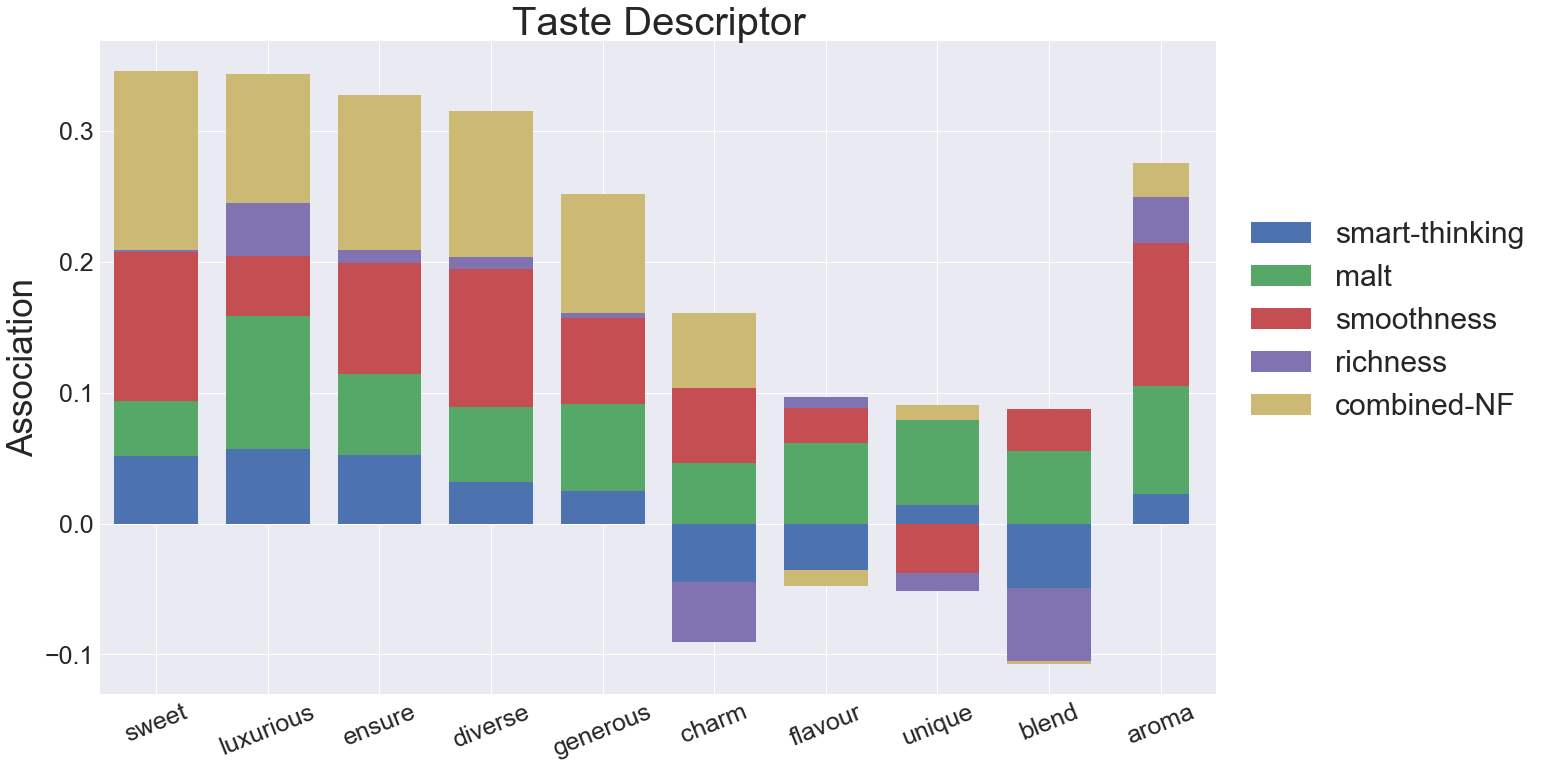

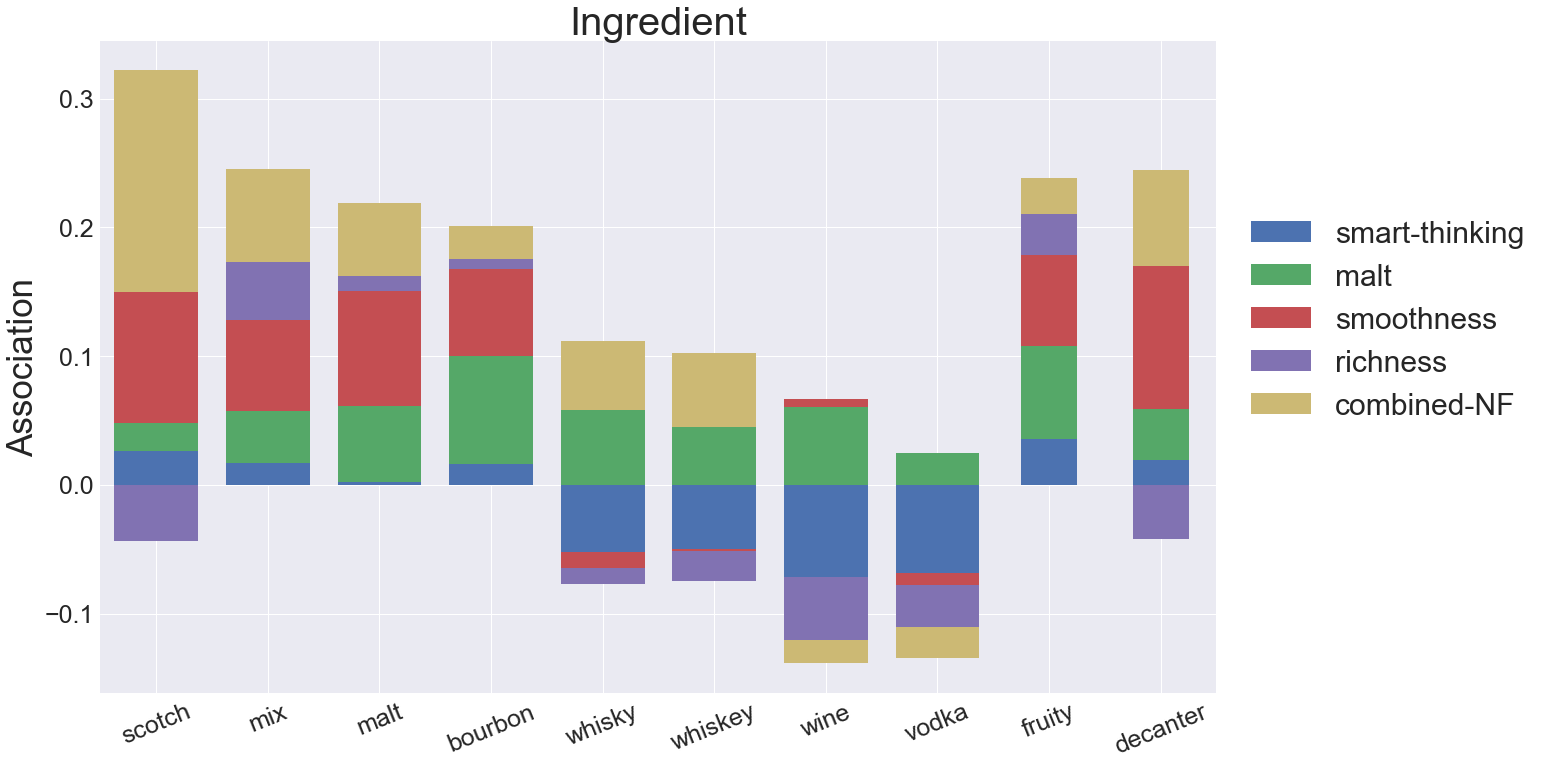

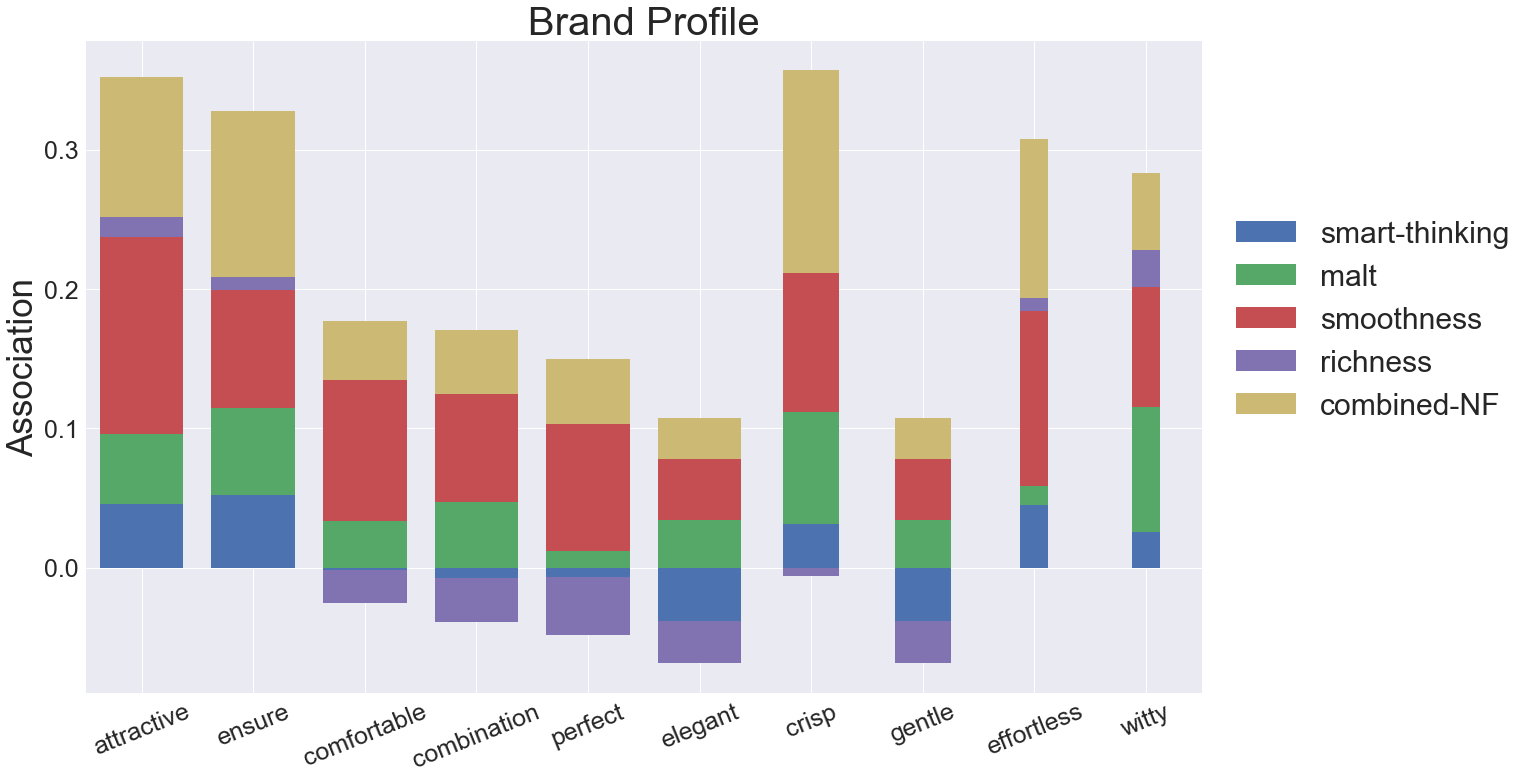

In [664]:
solo_bar_plot(tf, 'Taste Descriptor', 10, 'diageo+nfreduced')
solo_bar_plot(ti, 'Ingredient', 10, 'diageo+nfreduced')
solo_bar_plot(ts, 'Brand Profile', 10, 'diageo+nfreduced')

# Combination analysis

For the future

In [468]:
ti_words = return_top_k_words(ti.reset_index(), 10)
tf_words = return_top_k_words(tf.reset_index(), 10)
ts_words = return_top_k_words(ts.reset_index(), 10)

In [471]:
combinations = pd.DataFrame(list(product(ts_words, ti_words, tf_words)), columns = ['smart_thinking', 'ingredient', 'taste'])

In [473]:
combinations['smart_thinking_wv'] = combinations['smart_thinking'].map(lambda x: get_average_vector([x], emb))
combinations['ingredient_wv'] = combinations['ingredient'].map(lambda x: get_average_vector([x], emb))
combinations['taste_wv'] = combinations['taste'].map(lambda x: get_average_vector([x], emb))
combinations['wv'] = (combinations['smart_thinking_wv'] + combinations['ingredient_wv'] + combinations['taste_wv']) / 3

In [476]:
combinations = combinations.apply(lambda x: get_similarity_with_dimensions(x, chosen_ones), axis=1)
combinations = combinations.drop(columns=[x for x in combinations.columns if 'wv' in x])

In [478]:
combinations['label'] = combinations['smart_thinking'] + ' + ' + combinations['ingredient'] + ' + ' + combinations['taste']
combinations = combinations.set_index('label')

In [480]:
combinations['sum_over_dimensions'] = combinations['dim_dg_malt'] + combinations['dim_dg_smoothness'] + combinations['dim_dg_smart_thinking'] + combinations['dim_dg_richness']

In [482]:
combinations = combinations.sort_values('sum_over_dimensions', ascending=False)

In [483]:
combinations

,smart_thinking,ingredient,taste,dim_dg_malt,dim_dg_smoothness,dim_dg_smart_thinking,dim_dg_richness,sum_over_dimensions
label,,,,,,,,
subtle + malt + robust,subtle,malt,robust,0.695015,0.557965,0.375205,0.407421,2.035607
texture + malt + robust,texture,malt,robust,0.689446,0.583425,0.303466,0.442597,2.018934
texture + malt + extraordinary,texture,malt,extraordinary,0.693998,0.506595,0.235795,0.538950,1.975337
soft + malt + extraordinary,soft,malt,extraordinary,0.708634,0.548352,0.289824,0.425743,1.972553
subtle + malt + extraordinary,subtle,malt,extraordinary,0.683210,0.462580,0.297197,0.498010,1.940997
subtle + malt + rustic,subtle,malt,rustic,0.712726,0.508264,0.297077,0.404706,1.922773
subtle + malt + boast,subtle,malt,boast,0.723721,0.464709,0.250503,0.483148,1.922081
texture + malt + rustic,texture,malt,rustic,0.707258,0.535875,0.236122,0.438044,1.917298
soft + malt + robust,soft,malt,robust,0.667983,0.593894,0.339171,0.314228,1.915276
